## Logistic Regression

- Trying out logistic regression on a simple 2D dataset as illustrated in the Real Python blog
- In this example, I'm going to use a simple sigmoid function that is offset by a few x units from the origin
- The goal of this model is to predict if the y axis is positive, indicated by '1' or if the y axis coordinate is negative,
  indicated by a '0'.

## Forming the Sigmoid Sample Function

- Using numpy, let us first construct a sigmoid function which has a center at x=3 on the x axis and follows a curve on the y axis

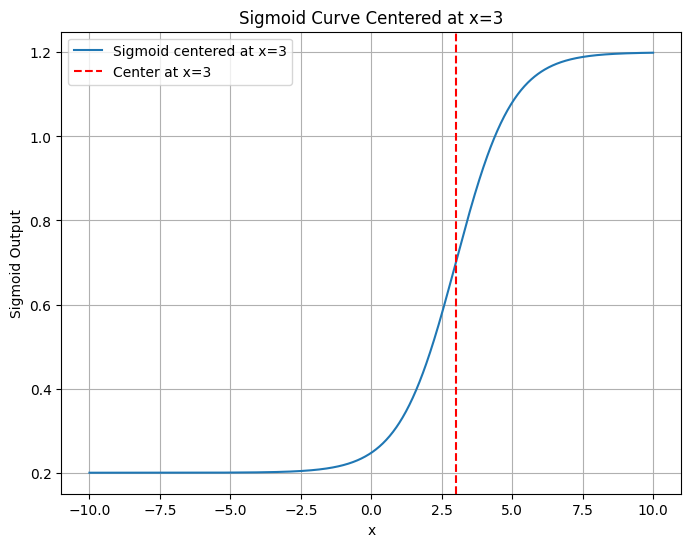

In [52]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid_centered_at_3(x):
  return 1 / (1 + np.exp(-(x - 3)))

# Example usage:
x_values = np.linspace(-10, 10, 1000) # Generate x values from -10 to 10
y_values = sigmoid_centered_at_3(x_values) + 0.2

# Plotting the curve to visualize
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Sigmoid centered at x=3')
plt.axvline(x=3, color='r', linestyle='--', label='Center at x=3')
plt.title('Sigmoid Curve Centered at x=3')
plt.xlabel('x')
plt.ylabel('Sigmoid Output')
plt.grid(True)
plt.legend()
plt.show()

## Fitting the Machine Learning model

- We would like to classify all y coordinates above the value 1.0 as '1' using the classifier and all y co-ords below 1.0 as '0'
- A simple Logistic Regression Classifer (Binary Classifier) would be sufficient for this task
- Using the TensorFlow library for logistic regression, we'll import the following functions
- Keras Sequential, with a sigmoid activation function

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
/job:localhost/replica:0/task:0/device:GPU:0
xtrain:  [ -9.41941942   0.71071071   3.91391391   1.15115115   6.73673674
   1.93193193  -6.6966967    8.37837838  -0.09009009   6.4964965
  -8.6986987   -7.17717718   8.51851852   6.55655656   3.11311311
  -3.37337337   3.29329329  -5.01501502   8.15815816   4.17417417
  -3.89389389   4.69469469   9.51951952  -9.01901902   7.93793794
  -9.95995996   0.89089089  -2.99299299   8.0980981    0.73073073
  -3.11311311   9.8998999   -0.37037037   1.51151151  -9.33933934
  -9.37937938  -5.37537538   9.27927928  -6.15615616  -3.33333333
  -9.93993994  -5.91591592   0.29029029   5.995996    -3.87387387
  -7.81781782  -1.39139139  -8.45845846  -8.31831832  -4.27427427
  -8.35835836   9.83983984   5.7957958    7.8978979   -2.03203203
  -3.53353353   0.39039039   8.33833834   8.45845846  -9.8998999
   4.63463463  -0.69069069  -8.05805806  -4.67467467  -2.85285285
   7.37737738   5.97597

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

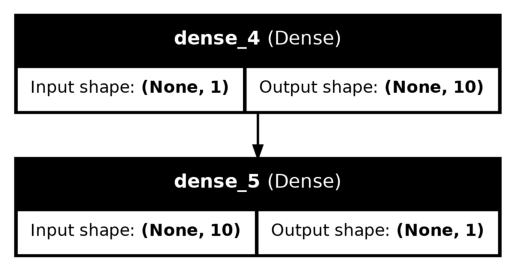

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.0000e+00 - loss: 0.4401 - val_accuracy: 0.0000e+00 - val_loss: 0.3376
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.4504 - val_accuracy: 0.0000e+00 - val_loss: 0.3212
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.4190 - val_accuracy: 0.0000e+00 - val_loss: 0.3005
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.3755 - val_accuracy: 0.0000e+00 - val_loss: 0.2600
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.3228 - val_accuracy: 0.0000e+00 - val_loss: 0.1693
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.1894 - val_accuracy: 0.0000e+00 - val_loss: 0.0822
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0886 - val_accuracy: 0.0000e+00 - val_loss: 0.0539
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy:

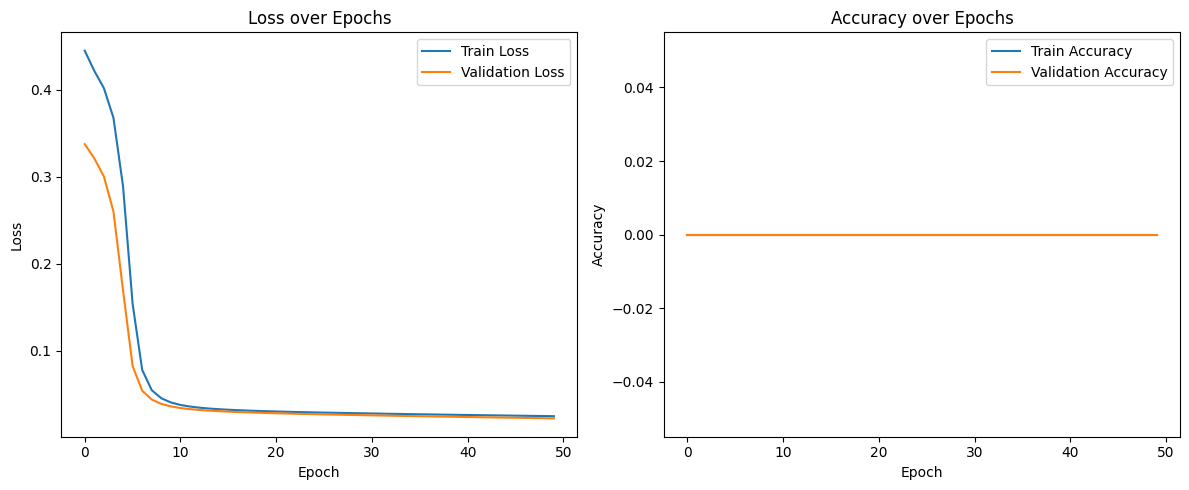

In [3]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Test the GPU
print(tf.config.list_physical_devices('GPU'))
print(tf.add(tf.constant([1.0, 2.0]), tf.constant([3.0, 4.0])).device)

# Import Keras
from tensorflow import keras

def sigmoid_centered_at_3(x):
  return 1 / (1 + np.exp(-(x - 3)))

# Example usage:
X = np.linspace(-10, 10, 1000) # Generate x values from -10 to 10
y = sigmoid_centered_at_3(X) + 0.2

# 1. Generate the test/train datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("xtrain: ", X_train, len(X_train))
print("xtest: ", X_test, len(X_test))
print("ytrain: ", y_train, len(y_train))
print("ytest: ", y_test, len(y_test))

print("xtrain shape: ", X_train.shape)

# 2. Construct the LR model
model = keras.Sequential([
    keras.layers.Input(shape=(1,)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# 3. Compile with metrics accuracy, only then will the evaluate function generate
# a test loss, test accuracy tuple, otherwise it will only return the loss
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])


# model = keras.Sequential([
#     keras.layers.Dense(1, activation='sigmoid', input_shape=(1,))
# ])

# # 3. Compile the model
# # For binary classification, we use 'binary_crossentropy' as the loss function
# # and 'accuracy' as a metric.
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# model.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])

model.summary()

# 4. Visualize the model
# Plot the model
keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


img = mpimg.imread('model.png')
imgplot = plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


# 4. Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# 5. Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# 6. Make predictions
predictions = model.predict(X_test)

for x, y, pred in zip(X_test, y_test, predictions):
    print(f"X: {x} y: {y} Prediction: {pred}")

# Convert probabilities to binary class labels (0 or 1)
# The confidence value indicates the probability of the prediction being labeled as a '1'
confidence = 0.70
predicted_classes = (predictions > confidence).astype(int)

print("\nSample predictions vs. actual labels:")
for i in range(10):
    print(f"Predicted: {predicted_classes[i]}, Actual: {y_test[i]}")


# 7. Visualize training history (optional)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

